<a href="https://colab.research.google.com/github/Antonego64/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from google.colab import drive
!pip install astroquery #esto para instalar astroquery
from astroquery.sdss import SDSS
drive.mount('/content/gdrive', force_remount=True) #esto último sirve para que use el nuevo archivo, ya que aún tiene datos del de la clase 4

    100% |████████████████████████████████| 4.2MB 5.3MB/s 
    100% |████████████████████████████████| 2.3MB 9.4MB/s 
    100% |████████████████████████████████| 102kB 29.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
  Stored in directory: /root/.cache/pip/wheels/4e/5b/1b/be8c8a830a0243af85b2946a0aece2c6743d7f7f946977ed67
Successfully built astroquery secretstorage


/usr/local/lib/python2.7/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Nota: no hay mucho que decir de aquí, solo bastaba copiar y pegar parte de la Actividad 4**

# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [2]:
#Con los simples comandos anteriores ya podemos acceder a todos los archivos que estén en nuestro drive
from astropy.io import fits
from astropy.wcs import WCS
filename = ('/content/gdrive/My Drive/Colab Notebooks/NGC0169.V500.rscube.fits.gz') #basta con el nombre
hdu_fits = fits.open(filename) #abre los fits, pueden abrirse comprimidos en gz
hdu = fits.open(filename)[0] #abre los fits, pueden abrirse comprimidos en gz
header = hdu.header
wcs = WCS(header) #permite leer el header world coordinate system
print wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 9.214901213555667  23.99078568841999  3749.0  
CRPIX : 37.0  33.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 78  72  1877


In [3]:
#Cargamos los datos (es opcional)
data = hdu.data
print data

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

In [4]:
print 'Valor 1 en el pixel de referencia = ',header['CRVAL1'] #valor inicial de la RA en el pixel de referencia
print 'Valor 2 en el pixel de referencia = ',header['CRVAL2'] #valor inicial de la DEC en el pixel de referencia
print 'Valor 3 en el pixel de referencia = ',header['CRVAL3'] #valor inicial de la longitud de onda en el pixel de referencia

print 'Pixel de referencia para variable 1 = ', header['CRPIX1'] #pixel de referencia para la RA inicial
print 'Pixel de referencia para variable 2 = ', header['CRPIX2'] #pixel de referencia para la DEC inicial
print 'Pixel de referencia para variable 3 = ', header['CRPIX3'] #pixel de referencia para la longitud de onda inicial

print 'Step para variable 1 = ', header['CD1_1'] #step o paso en deg entre cada pixel para la RA
print 'Step para variable 2 = ', header['CD2_2'] #step o paso en deg entre cada pixel para la DEC
print 'Step para variable 3 = ', header['CD3_3'] #step o paso en deg entre cada pixel para la Longitud de onda

Valor 1 en el pixel de referencia =  9.21490121356
Valor 2 en el pixel de referencia =  23.9907856884
Valor 3 en el pixel de referencia =  3749.0
Pixel de referencia para variable 1 =  37
Pixel de referencia para variable 2 =  33
Pixel de referencia para variable 3 =  1.0
Step para variable 1 =  -0.000277777777778
Step para variable 2 =  0.000277777777778
Step para variable 3 =  2.0


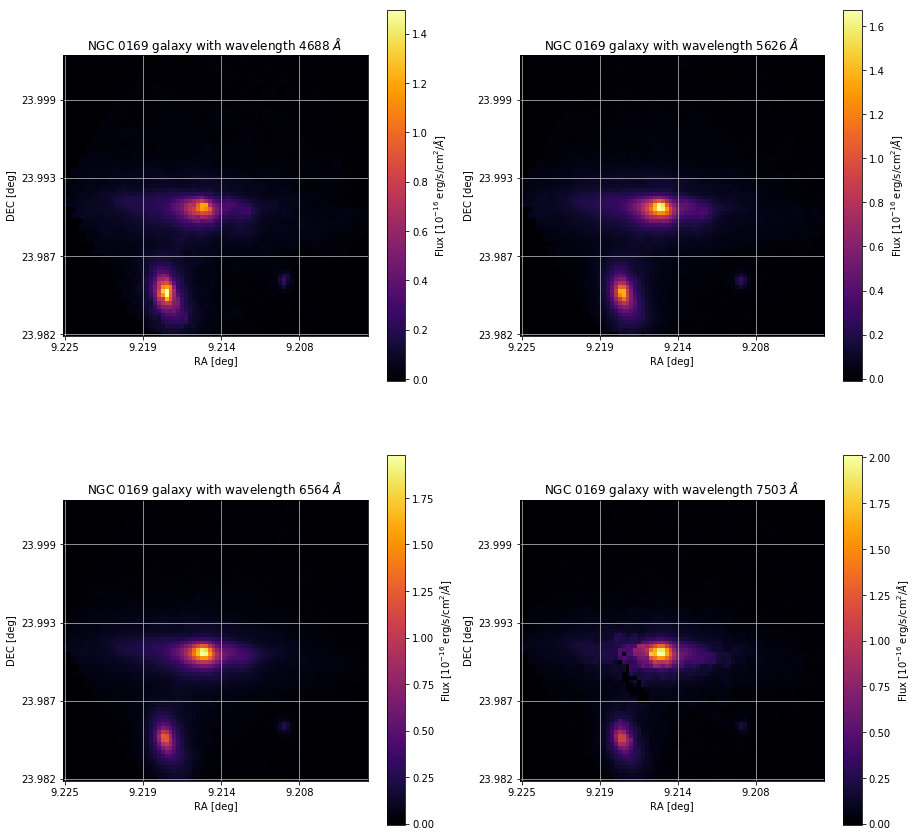

In [5]:
delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

plt.figure(figsize=(15,15)) #ancho y alto
plt.subplot(221)
plt.imshow(data[470],cmap='inferno',origin='lower')
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('NGC 0169 galaxy with wavelength 4688 $\AA$ ')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

plt.subplot(222)
plt.imshow(data[939],cmap='inferno',origin='lower')
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('NGC 0169 galaxy with wavelength 5626 $\AA$ ')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

plt.subplot(223)
plt.imshow(data[1407],cmap='inferno',origin='lower')
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('NGC 0169 galaxy with wavelength 6564 $\AA$ ') # ¡¡¡¡ESTA ES LA QUE NOS INDICAN!!!! (por tener longitud de onda cercana a la de H-alpha)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

plt.subplot(224)
plt.imshow(data[1871],cmap='inferno',origin='lower')
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('NGC 0169 galaxy with wavelength 7503 $\AA$ ')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

**Nota: Lo mismo que en la parte anterior, bastaba copiar, pegar y cambiar unas cosas.
Se puede apreciar en los subplots, que hay leves diferencias en el flujo entre ellos, además de la notoria mancha negra que hay en la parte inferior derecha**

La galaxia NGC 0169, se ve así:

![NGC 0169](https://upload.wikimedia.org/wikipedia/commons/1/15/NGC169_-_SDSS_DR14.jpg)

#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

Text(0,0.5,'Flux 10$^{-16}$ erg/s/cm$^2$/$\\AA$')

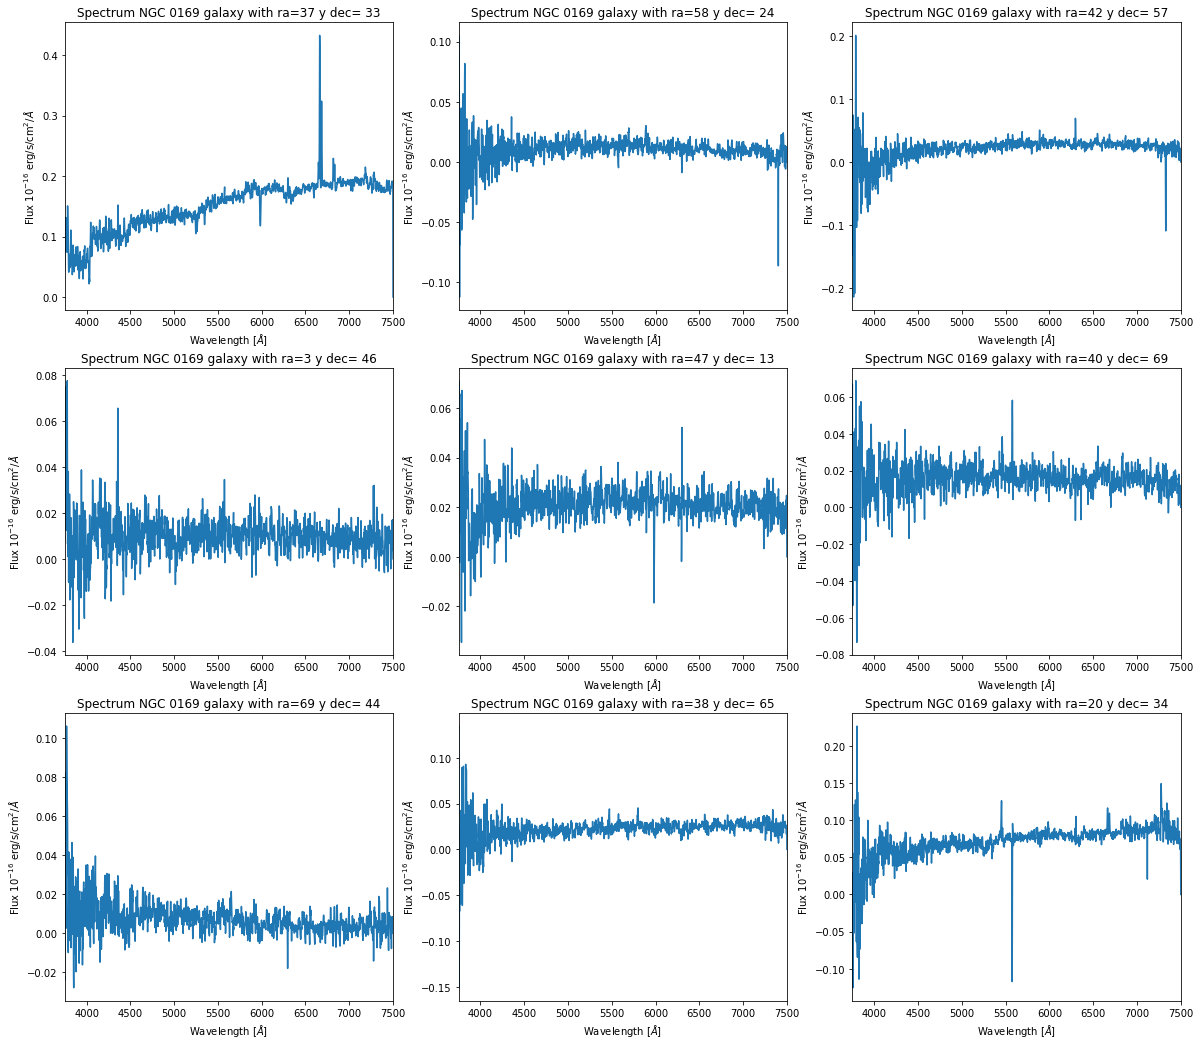

In [7]:
from random import randint
plt.figure(figsize=(20,18)) #ancho y alto

ra1=randint(0,72)  #si pongo 78 aquí, eventualmente se cae puesto que no hay pixeles >72 en dec
dec1=randint(0,72) #lo mismo para las demás de abajo...

ra2=randint(0,72) 
dec2=randint(0,72)

ra3=randint(0,72) 
dec3=randint(0,72)

ra4=randint(0,72) 
dec4=randint(0,72)

ra5=randint(0,72) 
dec5=randint(0,72)

ra6=randint(0,72) 
dec6=randint(0,72)

ra7=randint(0,72) 
dec7=randint(0,72)

ra8=randint(0,72) 
dec8=randint(0,72)


ra=header['CRPIX1'] #este y el de abajo, son los que corresponden con los pixeles que indica CRPIX (en las primeras dos coordenadas), en el header 
dec=header['CRPIX2']

plt.subplot(331) # primer subplot de 9 en total (notar que hay 3 filas x 3 columnas)
plt.plot(lo,data[:,ra,dec]) #este corresponde al que tenemos que hacer en el enunciado
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra)+ ' y dec= '+str(dec))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(332) # segundo subplot
plt.plot(lo,data[:,ra1,dec1])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra1)+ ' y dec= '+str(dec1))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(333) # tercer subplot
plt.plot(lo,data[:,ra2,dec2])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra2)+ ' y dec= '+str(dec2))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(334) # cuarto subplot
plt.plot(lo,data[:,ra3,dec3])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra3)+ ' y dec= '+str(dec3))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(335) # quinto subplot
plt.plot(lo,data[:,ra4,dec4])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra4)+ ' y dec= '+str(dec4))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(336) # sexto subplot
plt.plot(lo,data[:,ra5,dec5])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra5)+ ' y dec= '+str(dec5))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(337) # septimo subplot
plt.plot(lo,data[:,ra6,dec6])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra6)+ ' y dec= '+str(dec6))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(338) # octavo subplot
plt.plot(lo,data[:,ra7,dec7])
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra7)+ ' y dec= '+str(dec7))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

plt.subplot(339) # noveno subplot
plt.plot(lo,data[:,ra8,dec8]) 
plt.title('Spectrum NGC 0169 galaxy with ra='+str(ra8)+ ' y dec= '+str(dec8))
plt.xlim(3750,7500)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')

In [8]:
#Cálculo de redshift

maximo=np.argmax(data[:,ra,dec])
Halpha=6563.0 
cuociente=(2*maximo+3749)/Halpha #si se llegaran a usar los units de astropy, aquí se cancelarían
z=cuociente-1
print ('El redshift de NGC 0169 es: '+str(z)) #notar que z es adimensional

El redshift de NGC 0169 es: 0.015236934328813012


**Nota: Hice esta parte en inglés porque se veía más bonito. Por azar, entendí que había que usar la función randint de random. Cabe decir que algunos gráficos quedan "nulos" si hay datos inexistentes en la matriz 3D o si un número cae al azar fuera del rango del otro número, (porque hay datos que no existen para cierta coordenada, en este caso, ra) por esta razón es que en vez de poner 78, puse 72, para plotear el gráfico específico que decía el enunciado**

**Usando los "x" de data[x] y las longitudes de onda "y", finalmente determiné que la función que los relaciona es $y=2x+3749$. Sumado a esto, se usó la función np.argmax para obtener el x tal que data[:,ra,dec] alcanza su máximo, para finalmente despejar el redshift z de la ecuación que estaba en la Clase 4: $1+z=\lambda _{observado} / \lambda_{emitido}$ donde el emitido es la longitud de onda característica de $H\alpha$ **

**Cabe resaltar que el  z de NGC 0169 es positivo, lo que indica que se está alejando**

Info sobre argmax: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html#numpy.argmax

Info sobre Hα: https://en.wikipedia.org/wiki/H-alpha

Info sobre redshift: https://en.wikipedia.org/wiki/Redshift

Buscando en internet, resulta que solo hay registros del espectro de la galaxia NGC 0169 con velocidades en el eje X (y no longitudes de onda). No hay problema con esto, el z se puede calcular también así: $z=v/c$ con c, la velocidad de la luz en el vacío, como se ve en el anterior link

#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [9]:
#mi rut es 20.399.159-2
objeto = SkyCoord(ra=59*u.degree, dec=59*u.degree, frame='icrs')
print objeto

<SkyCoord (ICRS): (ra, dec) in deg
    (59., 59.)>


**Nota: aquí solo basta con copiar y pegar parte de la Actividad 4**

~~espero que no usen mi rut para fines malvados~~



#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [20]:
xid = SDSS.query_region(objeto, radius = 58000*u.arcsec, spectro=True)
sp = SDSS.get_spectra(matches=xid) #todo el espectro
imz = SDSS.get_images(matches=xid, band='z') #fotometría solo en la banda z
imi = SDSS.get_images(matches=xid, band='i') #fotometría en la banda i
#Hojiemos la fotometría
#print repr(imi[0][0].header)

headerz = imz[0][0].header
headeri = imi[0][0].header
wcsz = WCS(headerz) #permite leer el header world coordinate system
wcsi = WCS(headeri) #permite leer el header world coordinate system
print wcsi #con uno basta

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 49.584785628  42.9949345537  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 6.12302448862e-05  9.13428208622e-05  
CD2_1 CD2_2  : 9.13323616184e-05  -6.12604650012e-05  
NAXIS : 2048  1489


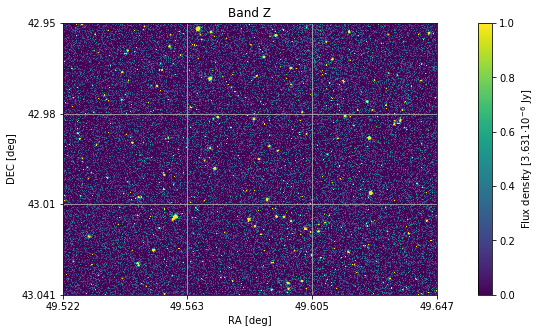

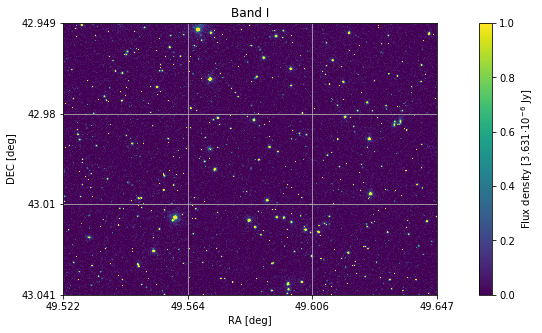

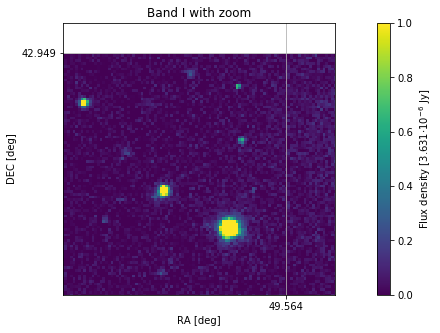

In [31]:
dataz = imz[0][0].data
datai = imi[0][0].data

delt1z = np.arange(0,headerz['NAXIS1']) - (headerz['CRPIX1']-1)
step1z = delt1z*headerz['CD1_1']
raz = step1z + headerz['CRVAL1']

delt2z = np.arange(0,headerz['NAXIS2']) - (headerz['CRPIX2']-1)
step2z = delt2z*headerz['CD2_2']
decz = step2z + headerz['CRVAL2']

delt1i = np.arange(0,headeri['NAXIS1']) - (headeri['CRPIX1']-1)
step1i = delt1i*headeri['CD1_1']
rai = step1i + headeri['CRVAL1']

delt2i = np.arange(0,headeri['NAXIS2']) - (headeri['CRPIX2']-1)
step2i = delt2i*headeri['CD2_2']
deci = step2i + headeri['CRVAL2']

#imagen banda z
plt.figure(figsize=(15,5))
plt.imshow(dataz,cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,len(raz)/3,2*len(raz)/3,len(raz)),(round(raz[0],3),round(raz[len(raz)/3],3),round(raz[2*len(raz)/3],3),round(raz[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,len(decz)/3,2*len(decz)/3,len(decz)),(round(decz[0],3),round(decz[len(decz)/3],3),round(decz[2*len(decz)/3],3),round(decz[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('Band Z')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda i
plt.figure(figsize=(15,5))
plt.imshow(datai,cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,len(rai)/3,2*len(rai)/3,len(rai)),(round(rai[0],3),round(rai[len(rai)/3],3),round(rai[2*len(rai)/3],3),round(rai[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,len(deci)/3,2*len(deci)/3,len(deci)),(round(deci[0],3),round(deci[len(deci)/3],3),round(deci[2*len(deci)/3],3),round(deci[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('Band I')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda i con zoom
plt.figure(figsize=(15,5))
plt.imshow(datai,cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,len(rai)/3,2*len(rai)/3,len(rai)),(round(rai[0],3),round(rai[len(rai)/3],3),round(rai[2*len(rai)/3],3),round(rai[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,len(deci)/3,2*len(deci)/3,len(deci)),(round(deci[0],3),round(deci[len(deci)/3],3),round(deci[2*len(deci)/3],3),round(deci[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.title('Band I with zoom')
plt.xlabel('RA [deg]')
plt.xlim(600,700)
plt.ylim(1400,1500)
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

  **Nota: Basta copiar y pegar parte de la Actividad 4. Al final ~~luego de muchos intentos y horas~~ encontré un objeto recién en 58000 arcsec, (como unos 18 grados centesimales según Google). Se ve bello la verdad :D**

#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 32  3847


Text(4102,9,'------------------------------------------- H-delta')

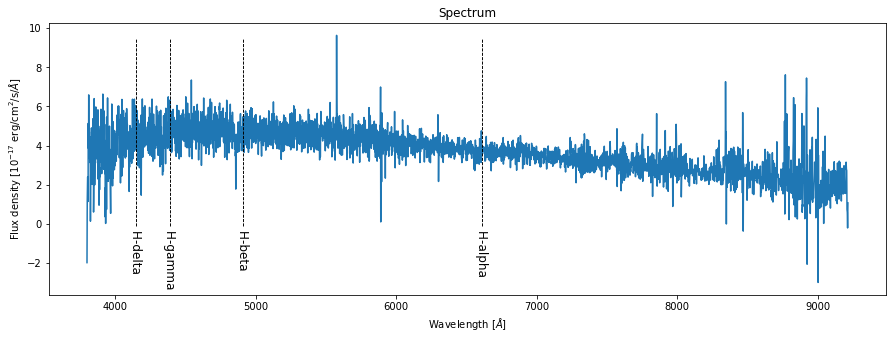

In [33]:
spfits=sp[0][1]
spheader=spfits.header #obtenemos el header
spwcs=WCS(spheader)
print(spwcs) #imprimimos el wcs header
scidata = spfits.data 
flux = scidata['flux'] #sacamos el flujo
lam = scidata['loglam']
plt.figure(figsize=(15,5))
plt.plot(10**(lam), flux)
plt.title('Spectrum')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux density [10$^{-17}$ erg/cm$^2$/s/$\AA$]')
plt.text(6564, 9, '------------------------------------------- H-alpha', rotation=-90, size=12) #aquí añadimos comentarios (indicamos algunas lineas de fraunhofer) sobre el ploteo
plt.text(4860, 9, '------------------------------------------- H-beta', rotation=-90, size=12) #la longitud de onda de H-beta es 4860 angstrom
plt.text(4339, 9, '------------------------------------------- H-gamma', rotation=-90, size=12) #la longitud de onda de H-gamma es 4339 angstrom
plt.text(4102, 9, '------------------------------------------- H-delta', rotation=-90, size=12) #la longitud de onda de H-delda es 4102 angstrom

**Nota: Al igual que en la parte anterior, solo basta copiar y pegar la última parte de la Actividad 4** Para indicar la lineas, tuve que ver lo que hice en la minitarea 1, cuando se ponía la info de cada planeta, aunque ahora además tuve que señalizar bien las lineas con varios "-" 

El objeto encontrado fue este: 
http://skyserver.sdss.org/dr15/en/tools/quicklook/summary.aspx?id=1237661056891947946 

Su espectro, según el data release 15 es este:
https://dr15.sdss.org/optical/spectrum/view?id=157521&plate=1251&mjd=52964&fiberid=1 

Info sobre la serie de Balmer y su rol en la astronomía: https://en.wikipedia.org/wiki/Balmer_series#Role_in_astronomy

Para indicar algunas líneas usé parte de esta tabla (de líneas de Fraunhofer) de aquí: https://en.wikipedia.org/wiki/Astronomical_spectroscopy#Chemical_properties 